In [120]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
tags = pd.read_csv('/content/gdrive/MyDrive/Company.csv')

In [123]:
data = pd.read_csv('/content/gdrive/MyDrive/CompanyValues.csv')

In [124]:
company_tweet = pd.read_csv('/content/gdrive/MyDrive/Company_Tweet.csv')

In [125]:
tweets = pd.read_csv('/content/gdrive/MyDrive/Tweet.csv')

Tweet related stuff

In [126]:
import datetime

tweets['day_date'] = pd.to_datetime(tweets['post_date'],unit='s').dt.strftime('%Y-%m-%d')

In [127]:
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,day_date
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,2015-01-01
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,2015-01-01
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,2015-01-01
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01


In [128]:
tweets = tweets[tweets['day_date']>='2018-12-25']

In [129]:
tweets_data = pd.merge(tweets,company_tweet,on=['tweet_id'])

In [130]:
#change company here
tweets_apple = tweets_data[tweets_data['ticker_symbol']=='AAPL']

In [131]:
len(tweets_apple)

219412

In [132]:
tweets_apple['num_tweets'] = 1
tweets_apple.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,day_date,ticker_symbol,num_tweets
8,1077354833198399488,HitTheBidRadio,1545696383,$AAPL damn https://stocktwits.com/HitTheBidRad...,0,0,3,2018-12-25,AAPL,1
9,1077354945156972544,HitTheBidRadio,1545696409,$AAPL crazy https://stocktwits.com/HitTheBidRa...,0,0,1,2018-12-25,AAPL,1
15,1077356407291301890,otc_cyborg,1545696758,"Investor: Bitcoin Won’t Fall To $0, Will Weath...",0,0,3,2018-12-25,AAPL,1
24,1077358595233234944,jsfree1,1545697280,Join @RobinhoodApp and we'll both get a stock ...,0,0,1,2018-12-25,AAPL,1
25,1077359076181454849,DaBoyYody,1545697394,Join @RobinhoodApp and we'll both get a stock ...,0,0,1,2018-12-25,AAPL,1


In [133]:
columns = ['day_date','num_tweets']
tweets_final_data = tweets_apple[columns].groupby(["day_date"]).sum()

In [134]:
len(tweets_final_data)

372

Price related stuff

In [135]:
#taking 2019 prices
data = data[data['day_date']>='2018-12-25']
data = data[data['day_date']<='2019-12-31']

In [136]:
#change company here
data = data[data['ticker_symbol']=='AAPL']

In [137]:
len(data)

372

In [138]:
data.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
103,AAPL,2019-12-31,293.65,25247630,289.93,293.68,289.5200
104,AAPL,2019-12-30,291.52,36059610,289.46,292.69,285.2200
105,AAPL,2019-12-27,289.80,36592940,291.12,293.97,288.1200
106,AAPL,2019-12-26,289.91,23334000,284.82,289.98,284.7000
107,AAPL,2019-12-24,284.27,12119710,284.69,284.89,282.9197


Merging both

In [139]:
total_data = pd.merge(data,tweets_final_data,on=['day_date'])

In [140]:
len(total_data)

372

In [141]:
sorted = total_data.sort_values(by=['day_date'],ascending=True)
sorted = sorted.reset_index(drop=True)


final_data = sorted[['day_date','close_value','num_tweets']]

lag_days = 7

final_data['log_close_value'] = np.log(final_data['close_value'])

temp = np.diff(final_data['log_close_value'], n=lag_days)
final_data = final_data[-365:]
final_data['lag_log_close_value'] = temp[-365:]
final_data['log_num_tweets'] = np.log(final_data['num_tweets'])

final_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,day_date,close_value,num_tweets,log_close_value,lag_log_close_value,log_num_tweets
7,2019-01-01,157.74,249,5.060948,0.057088,5.517453
8,2019-01-02,157.92,1734,5.062089,0.135839,7.458186
9,2019-01-03,142.19,4943,4.957164,-0.303632,8.505728
10,2019-01-04,148.26,1682,4.998967,0.832739,7.427739
11,2019-01-05,148.26,535,4.998967,-1.905208,6.282267


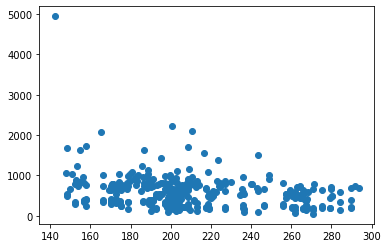

In [142]:
import matplotlib.pyplot as plt

plt.scatter(final_data['close_value'],final_data['num_tweets'])

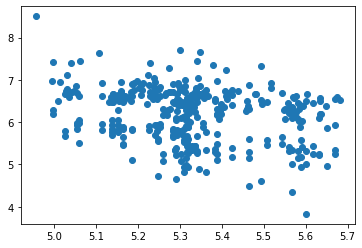

In [143]:
plt.scatter(final_data['log_close_value'],final_data['log_num_tweets'])

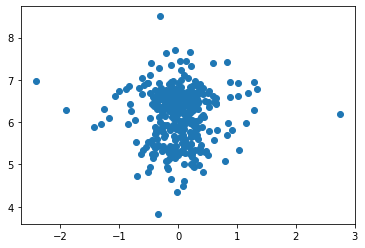

In [144]:
plt.scatter(final_data['lag_log_close_value'],final_data['log_num_tweets'])

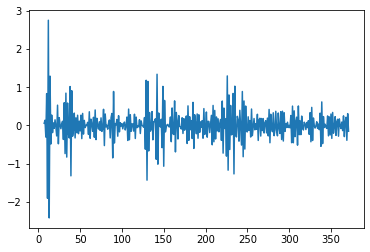

In [145]:
plt.plot(final_data.lag_log_close_value)

In [146]:
final_data.to_csv('final_data_apple.csv',index=True)